In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics

In [26]:
from sklearn.metrics import plot_confusion_matrix

In [2]:
from sklearn.metrics import roc_curve, auc

In [3]:
from tqdm import tqdm 

### DATASET = Original + Augmented

### MIC

### ALL

In [4]:
orig_loc = "./Data_CSV/Experiment_W_WO_CMN/"
aug_loc = "./Data_CSV/Augmneted_MFCC_data_csv/"

In [5]:
#without CMN #original_data
mic_all_orig_df = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/Without_CMN_mic(16k)_all.csv")
mic_bld_orig_df = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/withoutCMN(all)micB_L_D_DPB.csv")
mic_blt_orig_df = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/withoutCMN(all)micB_L_T_DPB.csv")
mic_brd_orig_df = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/withoutCMN(all)micB_R_D_DPB.csv")
mic_brt_orig_df = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/withoutCMN(all)micB_R_T_DPB.csv")

In [12]:
 mic_all_orig_df[mic_all_orig_df.iloc[:,73] == "2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json"]

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
3822,-2.614116,-18.573724,0.427921,-3.569279,-4.169259,3.970214,-7.490975,6.736947,-1.237351,5.470029,...,8.610018,8.458533,10.060281,10.159159,8.782894,9.432484,10.214192,7.932062,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3823,-2.776910,-15.581629,0.860484,-4.086998,-4.051142,4.445501,-5.359192,5.939819,-1.185230,4.687391,...,8.720760,9.309769,9.751379,9.629923,7.980651,9.422437,10.055173,8.329317,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3824,-3.003137,-19.602295,1.766545,-1.524846,-5.953271,6.458154,-2.913631,6.556034,0.931616,2.530814,...,9.048155,10.488694,7.377340,9.725195,7.088750,7.854371,11.275081,7.834894,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3825,-2.871036,-20.642961,-2.354512,-5.132237,-0.619400,6.835726,-5.328748,0.956369,3.053087,2.989265,...,8.146239,13.355627,10.013854,7.759375,9.394673,9.220314,10.456235,7.912167,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3826,-3.291291,-13.781242,-2.352252,-0.428691,4.244089,8.705494,-1.754927,1.060700,4.152364,3.014744,...,8.568958,13.032046,9.865285,7.439907,10.108941,11.052098,10.682142,7.900799,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3827,-3.294908,-11.165716,-2.841723,1.025326,4.600009,10.174324,-1.390497,1.057448,3.464565,4.781078,...,9.053287,14.080519,8.481052,8.009338,8.614683,9.582931,8.262057,7.673248,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3828,-2.959605,-9.379666,-0.044815,1.346252,5.729845,11.809475,-3.418832,2.168952,4.425024,1.149084,...,8.622436,14.742182,8.459184,7.375721,9.029537,8.314715,9.813140,7.385487,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3829,-3.858184,-12.285229,-2.962612,-1.011657,1.243052,8.802693,-1.969221,1.300678,3.680242,0.340009,...,7.579595,13.597310,7.755702,7.486079,8.735502,8.223617,9.917444,7.887256,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3830,-4.236953,-10.788276,-3.865095,-0.802424,2.674749,9.159897,-1.081951,5.868054,0.998483,5.772129,...,6.513133,11.418218,6.982582,9.882806,7.342408,10.167515,7.260514,7.414471,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3831,-4.156105,-16.611299,-1.636881,-2.191481,1.364663,7.425297,-2.604258,2.437859,-0.337859,3.496589,...,5.663230,10.924543,7.390479,8.101435,7.489365,8.657776,8.339697,7.073432,0.0,2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json


In [14]:
mic_all_aug_df[mic_all_aug_df.iloc[:,73]  == "Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json"]

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-3.357048,-7.136516,-2.702289,-2.277044,2.759249,2.739180,-3.827584,-1.444195,-0.634958,4.614733,...,6.740980,9.003449,8.924566,7.749146,7.850927,9.418743,9.582081,8.124411,0.0,Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
1,-2.880289,-10.977255,0.939133,-0.298059,1.789080,3.999441,-7.414026,2.190544,-2.082230,3.645407,...,6.529184,7.923973,10.234988,7.303497,9.008939,8.635308,9.835981,8.705915,0.0,Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
2,-2.950173,-10.092382,0.565220,-1.409069,-0.715399,2.332759,-6.082852,0.925304,-0.342280,6.067391,...,7.539288,7.060530,8.829652,7.793495,7.174339,9.777845,10.086432,7.282020,0.0,Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
3,-2.635573,-11.078412,0.489687,-2.527164,-0.902907,3.169489,-5.302797,1.692513,-0.336167,7.365621,...,9.401018,9.406954,9.146808,8.330088,8.101037,10.594564,9.280799,9.367727,0.0,Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
4,-2.977162,-10.126316,0.374031,-1.702536,-0.115652,3.413429,-5.089203,1.819131,0.409462,5.628683,...,7.100057,8.225938,9.505542,7.505438,7.059488,9.547974,8.367469,7.297381,0.0,Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,-3.410476,-25.996025,-1.470568,-2.970224,1.671212,3.486518,0.605190,1.620063,0.642010,1.730594,...,7.145622,8.702976,6.703612,7.558503,6.785703,7.573754,7.441239,6.822033,0.0,Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
26,0.575705,-22.165361,0.210099,-2.008634,3.690843,4.995452,3.026015,3.350383,2.961405,3.866485,...,6.304457,8.109652,6.686600,7.507708,7.501931,8.465093,7.539414,7.203871,0.0,Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
27,0.682540,-22.578207,-0.400390,-2.496304,2.290268,4.289744,0.656926,1.129329,1.176102,2.728497,...,5.810894,8.315708,6.648855,7.240824,7.662999,8.181266,8.018119,7.176164,0.0,Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json
28,0.712710,-23.197024,-0.392448,-2.428853,2.354142,3.439559,0.105733,2.023867,2.176730,2.887139,...,5.842205,7.933874,6.226221,7.303317,7.284452,7.583492,7.837353,7.401820,0.0,Aug2019_11_08_Kavitha_F_26_154_51_N_HC_NA.json


#### Augmented Data

In [15]:
mic_bld_aug_df = pd.read_csv("./Data_CSV/Augmneted_MFCC_data_csv/micB_L_D_DPB.csv")
mic_blt_aug_df = pd.read_csv("./Data_CSV/Augmneted_MFCC_data_csv/micB_L_T_DPB.csv")
mic_brd_aug_df = pd.read_csv("./Data_CSV/Augmneted_MFCC_data_csv/micB_R_D_DPB.csv")
mic_brt_aug_df = pd.read_csv("./Data_CSV/Augmneted_MFCC_data_csv/micB_R_T_DPB.csv")
mic_all_aug_df = pd.concat([mic_bld_aug_df,mic_blt_aug_df,mic_brd_aug_df,mic_brt_aug_df])

In [22]:
#fold
def fold(sound_dataframe, sets_loc, fold_type):
    big = []
    for j in os.listdir(sets_loc):      

        file = open(sets_loc+j, 'r') 
        Lines = file.readlines() 

        count = 0
        # Strips the newline character 
        # for line in Lines: 
        #     print("Line{}: {}".format(count, line.strip())) 
        try:
            set_dataframe = pd.DataFrame()
            for i, line in enumerate(Lines):
                if fold_type == 'original':
                    A = sound_dataframe[(sound_dataframe['73'] == (Lines[i].strip()+".json"))]
                else:
                    A = sound_dataframe[(sound_dataframe['73'] == ("Aug"+Lines[i].strip()+".json"))]
                set_dataframe = pd.DataFrame.append(set_dataframe,A)
        except:
            pass
            
        
        big.append(set_dataframe)
    fold_1 = shuffle(pd.concat(big[:6]))
    test_1 = shuffle(big[6])
    fold_2 = shuffle(pd.concat(big[1:7]))
    test_2 = shuffle(big[0])
    fold_3 = shuffle(pd.concat([big[0],big[2],big[3],big[4], big[5], big[6]]))
    test_3 = shuffle(big[1])
    fold_4 = shuffle(pd.concat([big[0],big[1],big[3],big[4], big[5], big[6]]))
    test_4 = shuffle(big[2])
    fold_5 = shuffle(pd.concat([big[0],big[2],big[1],big[4], big[5], big[6]]))
    test_5 = shuffle(big[3])
    fold_6 = shuffle(pd.concat([big[0],big[2],big[1],big[3], big[5], big[6]]))
    test_6 = shuffle(big[4])
    fold_7 = shuffle(pd.concat([big[0],big[2],big[1],big[4], big[3], big[6]]))
    test_7 = shuffle(big[5])
    
    return fold_1,test_1,fold_2,test_2,fold_3,test_3,fold_4,test_4,fold_5,test_5, fold_6, test_6, fold_7,test_7

In [23]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(mic_all_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(mic_all_aug_df, './Sets/', 'augmented')


In [24]:
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]

In [37]:
def SVM(fold_list):
    list_train = []
    list_test = []
    AUC = []
    for i in tqdm(range(0,len(fold_list),2)):
        fold = fold_list[i]
        test = fold_list[i+1]
        X_train = fold.iloc[:,:72]
        y_train = fold.iloc[:,72]
        X_test = test.iloc[:,:72]
        y_test = test.iloc[:,72]

        scaler = StandardScaler()

        X_train = scaler.fit_transform(X_train)

        X_test = scaler.transform(X_test)

        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)


        ### SVM

        svm = SVC()

        svm.fit(X_train,y_train)
        y_score = svm.decision_function(X_test)
        fpr, tpr, thr = roc_curve(y_test, y_score)
        roc_auc = auc(fpr,tpr)
        AUC.append(roc_auc)
        #plot confusion Matrix
#         plot_confusion_matrix(svm, X_test, y_test)
#         plt.savefig('CM'+str(i)+'jpg')
        
        list_test.append(accuracy_score(y_test,svm.predict(X_test)))

        list_train.append(accuracy_score(y_train,svm.predict(X_train)))
        
    return list_test, list_train, AUC




  0%|          | 0/7 [00:00<?, ?it/s]


 14%|█▍        | 1/7 [00:13<01:21, 13.52s/it]


 29%|██▊       | 2/7 [00:27<01:08, 13.66s/it]


 43%|████▎     | 3/7 [00:41<00:54, 13.64s/it]


 57%|█████▋    | 4/7 [00:54<00:40, 13.60s/it]


 71%|███████▏  | 5/7 [01:07<00:26, 13.29s/it]


 86%|████████▌ | 6/7 [01:20<00:13, 13.36s/it]


100%|██████████| 7/7 [01:34<00:00, 13.63s/it]

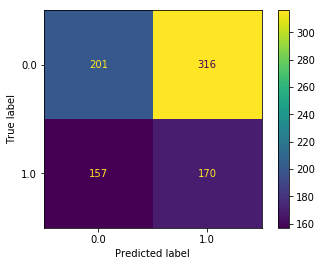

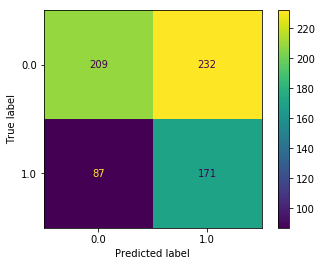

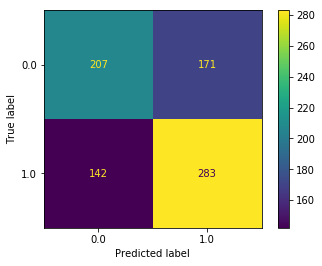

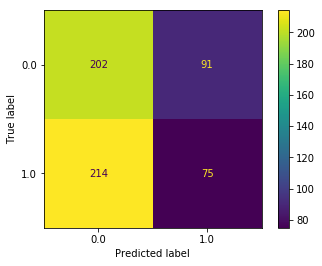

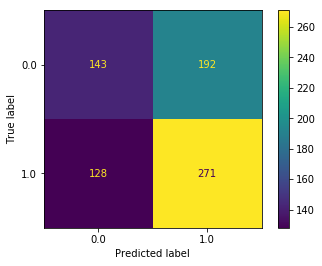

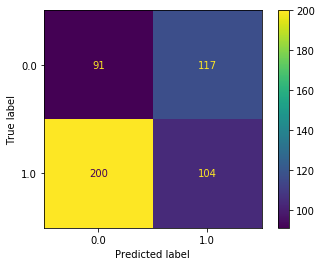

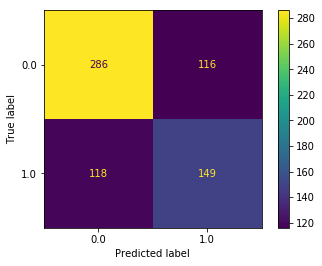

In [36]:
test, train, AUC = SVM(fold_list)

In [20]:
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

In [21]:
pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

,Train,Test,AUC
Fold1,0.970243,0.446682,0.458887
Fold2,0.974662,0.573677,0.670973
Fold3,0.970050,0.692403,0.755829
Fold4,0.970664,0.505155,0.474450
Fold5,0.970066,0.595368,0.646362
Fold6,0.975525,0.341797,0.344557
Fold7,0.969094,0.603886,0.656502
Mean,0.971472,0.536995,0.572509
STD,0.002343,0.107339,0.136433


In [16]:
pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

,Train,Test,AUC
Fold1,0.973281,0.439573,0.475923
Fold2,0.973009,0.543634,0.652929
Fold3,0.968659,0.610212,0.679770
Fold4,0.969992,0.475945,0.424578
Fold5,0.970952,0.564033,0.589923
Fold6,0.976717,0.380859,0.384125
Fold7,0.971131,0.650224,0.733607
Mean,0.971963,0.523497,0.562979
STD,0.002448,0.088864,0.125524


### BRT_MIC

In [17]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(mic_brt_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(mic_brt_aug_df, './Sets/', 'augmented')
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]

In [18]:
test, train, AUC = SVM(fold_list)
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

100%|██████████| 7/7 [00:07<00:00,  1.13s/it]


,Train,Test,AUC
Fold1,0.983763,0.443478,0.469006
Fold2,0.983399,0.534031,0.636521
Fold3,0.983740,0.555556,0.688422
Fold4,0.980769,0.537313,0.636120
Fold5,0.978292,0.605263,0.693255
Fold6,0.985130,0.580645,0.592802
Fold7,0.985435,0.679739,0.748355
Mean,0.982933,0.562289,0.637783
STD,0.002356,0.067148,0.083136


### BRD_MIC

In [19]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(mic_brd_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(mic_brd_aug_df, './Sets/', 'augmented')
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]

In [20]:
test, train, AUC = SVM(fold_list)
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

100%|██████████| 7/7 [00:08<00:00,  1.23s/it]


,Train,Test,AUC
Fold1,0.987250,0.541063,0.542657
Fold2,0.978638,0.697183,0.777073
Fold3,0.975121,0.697674,0.757572
Fold4,0.979028,0.556962,0.424451
Fold5,0.979831,0.532020,0.516145
Fold6,0.980986,0.366197,0.349559
Fold7,0.980225,0.633880,0.713613
Mean,0.980154,0.574997,0.583010
STD,0.003382,0.107150,0.156264


### BLT_Mic

In [21]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(mic_blt_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(mic_blt_aug_df, './Sets/', 'augmented')
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]

In [22]:
test, train, AUC = SVM(fold_list)
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

100%|██████████| 7/7 [00:08<00:00,  1.26s/it]


,Train,Test,AUC
Fold1,0.990643,0.334884,0.451238
Fold2,0.987678,0.569307,0.659917
Fold3,0.985885,0.655660,0.713741
Fold4,0.987635,0.682759,0.785388
Fold5,0.984390,0.608696,0.687381
Fold6,0.990667,0.265152,0.202770
Fold7,0.987385,0.694611,0.776778
Mean,0.987755,0.544438,0.611030
STD,0.002131,0.160676,0.195978


### BLD_MIC

In [23]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(mic_bld_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(mic_bld_aug_df, './Sets/', 'augmented')
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]

In [24]:
test, train, AUC = SVM(fold_list)
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

100%|██████████| 7/7 [00:08<00:00,  1.16s/it]


,Train,Test,AUC
Fold1,0.983707,0.453125,0.504687
Fold2,0.981188,0.695122,0.745283
Fold3,0.981205,0.413793,0.419006
Fold4,0.979349,0.296552,0.262938
Fold5,0.978550,0.543590,0.553715
Fold6,0.985613,0.210526,0.126014
Fold7,0.981491,0.397516,0.478365
Mean,0.981586,0.430032,0.441430
STD,0.002244,0.146883,0.185992


### EKO

### ALL

In [25]:
#without CMN #original_data
eko_all_orig_df  = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/Without_CMN_eko_all.csv")
eko_bld_orig_df  = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/withoutCMN(all)ekoB_L_D_DPB.csv")
eko_blt_orig_df  = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/withoutCMN(all)ekoB_L_T_DPB.csv")
eko_brd_orig_df  = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/withoutCMN(all)ekoB_R_D_DPB.csv")
eko_brt_orig_df  = pd.read_csv("Data_CSV/Experiment_W_WO_CMN/withoutCMN(all)ekoB_R_T_DPB.csv")
eko_bld_aug_df   = pd.read_csv("./Data_CSV/Augmneted_MFCC_data_csv/ekoB_L_D_DPB.csv")
eko_blt_aug_df   = pd.read_csv("./Data_CSV/Augmneted_MFCC_data_csv/ekoB_L_T_DPB.csv")
eko_brd_aug_df   = pd.read_csv("./Data_CSV/Augmneted_MFCC_data_csv/ekoB_R_D_DPB.csv")
eko_brt_aug_df   = pd.read_csv("./Data_CSV/Augmneted_MFCC_data_csv/ekoB_R_T_DPB.csv")
eko_all_aug_df   = pd.concat([eko_bld_aug_df,eko_blt_aug_df,eko_brd_aug_df,eko_brt_aug_df]) 

In [26]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(eko_all_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(eko_all_aug_df, './Sets/', 'augmented')


In [27]:
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]

In [28]:
test, train, AUC = SVM(fold_list)
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

100%|██████████| 7/7 [00:58<00:00,  8.41s/it]


,Train,Test,AUC
Fold1,0.902790,0.560427,0.585044
Fold2,0.902934,0.596567,0.709513
Fold3,0.901176,0.485679,0.480710
Fold4,0.903252,0.678694,0.712578
Fold5,0.894314,0.678474,0.765301
Fold6,0.916022,0.523438,0.665976
Fold7,0.905726,0.626308,0.659064
Mean,0.903745,0.592798,0.654027
STD,0.006000,0.068857,0.087713


### BRT_eko

In [29]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(eko_brt_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(eko_brt_aug_df, './Sets/', 'augmented')


In [30]:
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]

In [31]:
test, train, AUC = SVM(fold_list)
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


,Train,Test,AUC
Fold1,0.947938,0.604348,0.581131
Fold2,0.933598,0.738220,0.824671
Fold3,0.933943,0.648148,0.729674
Fold4,0.938086,0.589552,0.560089
Fold5,0.927481,0.598684,0.652159
Fold6,0.943773,0.653226,0.646253
Fold7,0.936008,0.673203,0.710526
Mean,0.937261,0.643626,0.672072
STD,0.006310,0.048435,0.084479


### BRD_eko

In [32]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(eko_brd_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(eko_brd_aug_df, './Sets/', 'augmented')
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]
test, train, AUC = SVM(fold_list)
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


,Train,Test,AUC
Fold1,0.943500,0.714976,0.763437
Fold2,0.944601,0.450704,0.681936
Fold3,0.940097,0.424419,0.364927
Fold4,0.932793,0.746835,0.852107
Fold5,0.930777,0.482759,0.419860
Fold6,0.945540,0.521127,0.746394
Fold7,0.946289,0.459016,0.423382
Mean,0.940514,0.542834,0.607435
STD,0.005841,0.122396,0.183976


### BLT_eko

In [33]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(eko_blt_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(eko_blt_aug_df, './Sets/', 'augmented')
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]
test, train, AUC = SVM(fold_list)
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

100%|██████████| 7/7 [00:03<00:00,  1.75it/s]


,Train,Test,AUC
Fold1,0.936660,0.553488,0.538952
Fold2,0.953555,0.465347,0.577200
Fold3,0.947368,0.292453,0.277359
Fold4,0.950090,0.648276,0.789193
Fold5,0.940820,0.565217,0.663452
Fold6,0.959111,0.393939,0.537855
Fold7,0.954587,0.700599,0.783828
Mean,0.948885,0.517046,0.595406
STD,0.007340,0.132466,0.162863


### BLD_eko 

In [34]:
f1,t1,f2,t2,f3,t3,f4,t4,f5,t5,f6,t6,f7,t7 = fold(eko_bld_orig_df, './Sets/', 'original')
f1_aug,t1_aug,f2_aug,t2_aug,f3_aug,t3_aug,f4_aug,t4_aug,f5_aug,t5_aug,f6_aug,t6_aug,f7_aug,t7_aug = fold(eko_bld_aug_df, './Sets/', 'augmented')
fold_list = [shuffle(pd.concat([f1,f1_aug])),t1,shuffle(pd.concat([f2,f2_aug])),t2,shuffle(pd.concat([f3,f3_aug])),t3,shuffle(pd.concat([f4,f4_aug])),t4,shuffle(pd.concat([f5,f5_aug])),t5,shuffle(pd.concat([f6,f6_aug])),t6,shuffle(pd.concat([f7,f7_aug])),t7 ]
test, train, AUC = SVM(fold_list)
test.append(np.mean(test))
test.append(np.std(test[:7]))

train.append(np.mean(train))
train.append(np.std(train[:7]))

AUC.append(np.mean(AUC))
AUC.append(np.std(AUC[:7]))

pd.DataFrame(np.concatenate((np.array(train).reshape(9,1), np.array(test).reshape(9,1), np.array(AUC).reshape(9,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7', 'Mean', 'STD'], columns=['Train', 'Test', 'AUC'])

100%|██████████| 7/7 [00:04<00:00,  1.79it/s]


,Train,Test,AUC
Fold1,0.947047,0.427083,0.401897
Fold2,0.950990,0.591463,0.688842
Fold3,0.949537,0.334975,0.261696
Fold4,0.941691,0.620690,0.635274
Fold5,0.946374,0.651282,0.753953
Fold6,0.960377,0.421053,0.701014
Fold7,0.956071,0.503106,0.524840
Mean,0.950298,0.507093,0.566788
STD,0.005807,0.109713,0.166761
